In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Parameter setting
Nt = 200
fS = 80*10**6 #[Hz], sampling freq.
fC = 5*10**6 #[Hz], carrier freq. of the pulse
alpha = 20*10**12 #[Hz]**2
c0 = 6300 #[m/S]
dxdata = 0.5*10**-3 #[m]
dzdata = 0.5* c0/(fS)
p_def = np.array([10*dxdata, 91*dzdata])
r"""
wavelength = 1.26* 10**-3 # [m]
Nx = 20
Nz = Nt
"""

'\nwavelength = 1.26* 10**-3 # [m]\nNx = 20\nNz = Nt\n'

In [18]:
class PulseFormer():
    """ Pulse former for a sinlge defect and single scan position. 
    """
    def __init__(self):
        self.env = None
        self.complex_pulse = None
        self.ip_pulse = None
        self.q_pulse = None
        self.grad_complex = None
        self.grad_ip = None
    
    def get_complex_pulse(self):
        return self.complex_pulse
    
    def get_grad_complex(self):
        return self.grad_complex
        
    def get_ip_pulse(self):
        return self.ip_pulse
    
    def get_grad_ip(self):
        return self.grad_ip
    
        
class PulseFormerGabor(PulseFormer):
    def __init__(self, Nt, fS, fC, alpha):
        self.Nt = int(Nt)
        self.fS = float(fS)
        self.fC = float(fC)
        self.alpha = float(alpha)
        
    def set_t(self, tau):
        self.t = (np.arange(0, self.Nt)/ self.fS - tau)
        self.omega = 2* np.pi* self.fC
        self.env = np.exp(-self.alpha* self.t**2)
        
    def calculate_complex_pulse(self, tau):
        self.set_t(tau)
        self.complex_pulse = self.env* np.exp(1j* self.omega* self.t)
        
    def calculate_ip_pulse(self, tau):
        self.set_t(tau)
        self.ip_pulse = self.env* np.cos(self.omega* self.t)
        
    def calculate_q_pulse(self):
        self.q_pulse = self.env* np.sin(self.omega* self.t)
        
    def calculate_grad_complex(self, grad_tau):
        first_term = 2* self.alpha* self.t* grad_tau* self.complex_pulse
        second_term = -1j* self.omega* grad_tau* self.complex_pulse
        self.grad_complex = first_term + second_term
        
    def calculate_grad_ip(self, grad_tau):
        self.calculate_q_pulse()
        first_term = 2* self.alpha* self.t* grad_tau* self.ip_pulse
        second_term = self.omega* grad_tau* self.q_pulse
        self.grad_ip = first_term + second_term
        
        

In [23]:
# ToF
p_scan = np.array([5*dxdata, 0*dzdata])
tau = 2*np.linalg.norm(p_def - p_scan)/ c0
grad_tau = 4* (p_def[0] - p_scan[0])/ (tau* c0**2)
# Pulse
pformer = PulseFormerGabor(Nt, fS, fC, alpha)
pformer.calculate_complex_pulse(tau)
pformer.calculate_ip_pulse(tau)
comp_pulse = pformer.get_complex_pulse()
ip_pulse = pformer.get_ip_pulse()
# Derivative
pformer.calculate_grad_complex(grad_tau)
pformer.calculate_grad_ip(grad_tau)
grad_comp = pformer.get_grad_complex()
grad_ip = pformer.get_grad_ip()

In [24]:
np.where(abs(ip_pulse) == abs(ip_pulse).max())

(array([111]),)

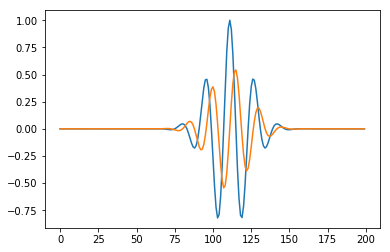

In [32]:
plt.plot(ip_pulse)
plt.plot(grad_ip*0.1*10**-3)

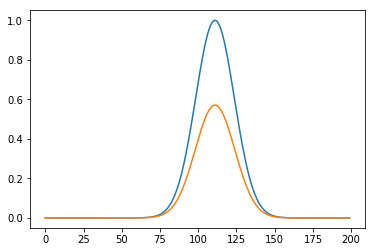

In [34]:
plt.plot(abs(comp_pulse))
plt.plot(abs(grad_comp*0.1*10**-3))